##### **Importing required libraries**

In [29]:
import zipfile
import os
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('indian')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
import numpy as np
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


In [2]:
# Extracting all data files from downloaded zip file
with zipfile.ZipFile('/content/drive/MyDrive/Language Translation/parallel.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [3]:
# Reading the data from the file and storing english text data in the list.

en_data_list = []
with open('/content/parallel-n/IITB.en-hi.en', "r", encoding="utf-8") as file:
    for line in file:
        en_data_list.append(line.strip())

In [4]:
en_data_list

['Give your application an accessibility workout',
 'Accerciser Accessibility Explorer',
 'The default plugin layout for the bottom panel',
 'The default plugin layout for the top panel',
 'A list of plugins that are disabled by default',
 'Highlight duration',
 'The duration of the highlight box when selecting accessible nodes',
 'Highlight border color',
 'The color and opacity of the highlight border.',
 'Highlight fill color',
 'The color and opacity of the highlight fill.',
 'API Browser',
 'Browse the various methods of the current accessible',
 'Hide private attributes',
 'Method',
 'Property',
 'Value',
 'IPython Console',
 'Interactive console for manipulating currently selected accessible',
 'Event monitor',
 '_ Monitor Events',
 'C _ lear Selection',
 'Everything',
 'Selected application',
 'Selected accessible',
 'Source',
 'Event Monitor',
 'Shows events as they occur from selected types and sources',
 'Highlight last event entry',
 'Start / stop event recording',
 'Clear 

In [5]:
# Reading the data from the file and storing hindi text data in the list.

hin_data_list = []
with open('/content/parallel-n/IITB.en-hi.hi', "r", encoding="utf-8") as file:
    for line in file:
        hin_data_list.append(line.strip())

In [6]:
hin_data_list

['अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें',
 'एक्सेर्साइसर पहुंचनीयता अन्वेषक',
 'निचले पटल के लिए डिफोल्ट प्लग-इन खाका',
 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका',
 'उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है',
 'अवधि को हाइलाइट रकें',
 'पहुंचनीय आसंधि (नोड) को चुनते समय हाइलाइट बक्से की अवधि',
 'सीमांत (बोर्डर) के रंग को हाइलाइट करें',
 'हाइलाइट किए गए सीमांत का रंग और अपारदर्शिता।',
 'भराई के रंग को हाइलाइट करें',
 'हाइलाइट किया गया भराई का रंग और पारदर्शिता।',
 'एपीआई विचरक',
 'इस समय जिसे प्राप्त किया गया हो, उसकी विभिन्न विधियों (मेथड) में विचरण करें',
 'निजी गुणों को छिपाएं',
 'विधि',
 'गुणधर्म',
 'मान',
 'आईपाइथन कन्सोल',
 'इस समय चुने गए एक्सेसेबेल से काम लेने के लिए अंतर्क्रियात्मक कन्सोल',
 'घटना मानिटर',
 'घटनाओं को मानिटर करें (_ M)',
 'चुनाव को हटाएं (C _)',
 'सभी',
 'चुने गए अनुप्रयोग',
 'चुने गए एक्सेसेबेल',
 'स्रोत',
 'घटना मानिटर',
 'चुने गए प्रकारों और स्रोतों से घटनाएं जैसे-जैसे घटित होती हैं, उन्हें दर्शाता है',
 'अंतिम प्रविष्ट घटना को

In [7]:
# checking the length of the text data in the english language list.
len(en_data_list)

1659083

In [8]:
# checking the length of the text data in the hindi language list.
len(hin_data_list)

1659083

There are 1.659083 million data points in both the English and Hindi languages

In [9]:
# Creating a dataframe from english and hindi text data.

data  = pd.DataFrame(list(zip(hin_data_list,en_data_list)),columns = ['hindi','english'])
data.head() # Displaying the first 5 rows of the data.

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default


In [41]:
# decontractions -  This function takes phrase in english language as input 
# and replaces contractions in the phrase with their expanded forms. For example, "won't" would be replaced
# with "will not", and in Italian, "'re" would be replaced with "sono". It uses
# a dictionary called contractions to map contractions to their expansions.

def decontractions(phrase):

    # decontractions for english language
    contractions = {
            "won't": "will not",
            "can't": "can not",
            "n't": " not",
            "'re": " are",
            "'s": " is",
            "'d": " would",
            "'ll": " will",
            "'t": " not",
            "'ve": " have",
            "'m": " am"
                    }
    for contraction, replacement in contractions.items():
        phrase = re.sub(contraction, replacement, phrase)
    return phrase

# preprocess - This function performs preprocessing tasks on a given text based
# on the specified language. First, it converts the text to lowercase. Then,
# it calls decontractions to expand contractions if any. Depending on the language,
# it applies specific regular expressions to clean the text from unwanted characters
# such as punctuation and special symbols. After that, it removes single-letter words
# and stopwords (commonly occurring words like "the", "is", "and", etc.) using
# language-specific stopwords lists obtained from NLTK's stopwords module.
# The preprocessed text is then returned.

def preprocess(text, language):

    if language == 'en':
        text = text.lower() # converts the text to lower case.
        text = decontractions(text) # applies the function decontractions on the text.
        text = re.sub('[^A-Za-z]+', ' ', text) # removes all non-alphabetic characters
                                              # from the text string, leaving only letters
                                              # (either uppercase or lowercase).
    elif language == 'hin':
        hindi_words = re.compile(r'[\u0900-\u097F]+').findall(text) # Regular expression to match Hindi words
                                                                    # and returns in the form of list
        text        = ' '.join(hindi_words)                         # converts list of words to string

    text = ' '.join([word for word in text.split() if len(word) > 1]) # Removing single-letter words.

    if language == 'en':
        stop_words = set(stopwords.words('english')) # extracting stopwords from english language
    elif language == 'hin':
        stop_words = []
        # extracting stopwords from hindi language
        with open('/content/drive/MyDrive/Language Translation/stopwords.txt', "r", encoding="utf-8") as file:
            for line in file:
                stop_words.append(line.strip())
        stop_words = set(stop_words)
    text = ' '.join([word for word in text.split() if word not in stop_words]) # removes stopwords from
                                                                               # the text string and joins
                                                                               # the remaining words into a
                                                                               # single string separated by spaces.

    return text

In [42]:
# Creating a dataframe copy
cleaned_data = data.copy()

In [43]:
# Applying the preprocess function to english and hindi columns.
cleaned_data['hindi'] = data['hindi'].progress_apply(preprocess,language='hin')
cleaned_data['english'] = data['english'].progress_apply(preprocess,language='en')

100%|██████████| 1659083/1659083 [05:30<00:00, 5025.81it/s]


In [44]:
# Displaying the first 5 rows of the data.
cleaned_data.head()

,hindi,english
0,अनुप्रयोग पहुंचनीयता व्यायाम लाभ दें,give application accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,accerciser accessibility explorer
2,निचले पटल के डिफोल्ट प्लग खाका,default plugin layout bottom panel
3,ऊपरी पटल के डिफोल्ट प्लग खाका,default plugin layout top panel
4,प्लग इनों सूची डिफोल्ट रूप निष्क्रिय,list plugins disabled default


In [45]:
# Storing the cleaned dataframe in pickle file
cleaned_data.to_pickle('/content/drive/MyDrive/Language Translation/cleaned_data.pickle')

In [46]:
# Loading the pickle file
cleaned_data = pd.read_pickle('/content/drive/MyDrive/Language Translation/cleaned_data.pickle')

In [47]:
# calculate the number of words in each entry of the 'hindi' and 'english' columns.
# These lengths are extracted to check the distribution of word lengths.

hin_lengths = cleaned_data['hindi'].str.split().progress_apply(len)
eng_lengths = cleaned_data['english'].str.split().progress_apply(len)

100%|██████████| 1659083/1659083 [00:02<00:00, 596330.43it/s]


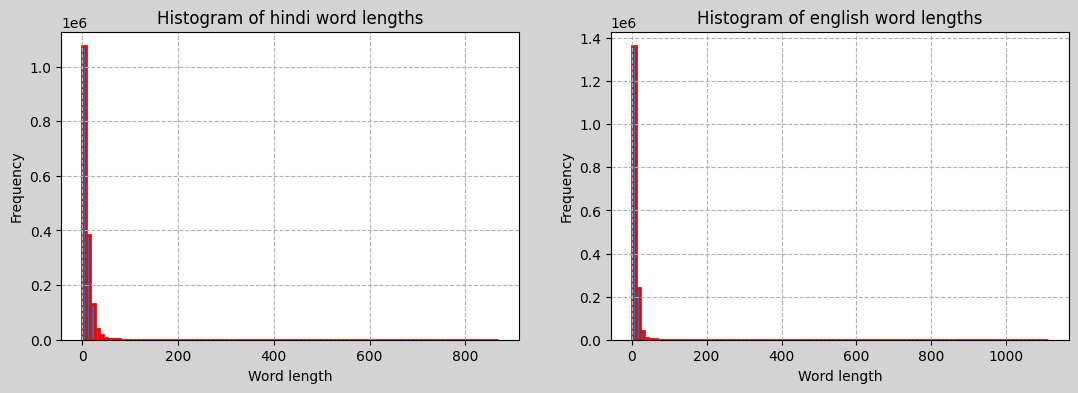

In [48]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.hist(hin_lengths, bins = 100, edgecolor='red',linewidth=2)
plt.gcf().set_facecolor('lightgrey')
plt.title('Histogram of hindi word lengths')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.hist(eng_lengths, bins = 100, edgecolor='red',linewidth=2)
plt.gcf().set_facecolor('lightgrey')
plt.title('Histogram of english word lengths')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.grid(linestyle='--')

plt.show()

It can be observed from the above histograms that the distribution of word lengths for both hindi and english are skewed towards right. The following things can be inferred.<br>
* There are more sentences with less number of words in text in both english and hindi languages for the given data.<br>

In [49]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(hin_lengths, i))

99.1 43.0
99.2 44.0
99.3 46.0
99.4 48.0
99.5 51.0
99.6 54.0
99.7 58.0
99.8 64.0
99.9 75.0
100 869.0


These percentiles give us an idea of the spread and distribution of lengths within the list hin_lengths. The 99.9th percentile is 75 suggests that the vast majority of data points have a length of 75 or less, with only a very small fraction having lengths greater than that.

In [50]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(eng_lengths, i))

99.1 34.0
99.2 36.0
99.3 37.0
99.4 39.0
99.5 42.0
99.6 45.0
99.7 49.0
99.8 55.0
99.9 65.0
100 1111.0


Within the eng_lengths list, the 99.9th percentile is 65 suggests that the vast majority of data points have a length of 65 or less, with only a very small fraction having lengths greater than that.

In [51]:
cleaned_data['hindi_len'] = cleaned_data['hindi'].str.split().apply(len)
cleaned_data = cleaned_data[cleaned_data['hindi_len'] < 75]

cleaned_data['english_len'] = cleaned_data['english'].str.split().apply(len)
cleaned_data = cleaned_data[cleaned_data['english_len'] < 65]

# Prepend a special token '<start>' to the beginning of each hindi sentence and
# append '<end>' to the end. This is done to indicate the start and end of the sequence.
cleaned_data['hindi']     = '<start> ' + cleaned_data['hindi'].astype(str) + '<end>'

# Prepend '<start>' to the beginning of each English sentence. This modified English
# sentence will be used as input during training.
cleaned_data['english_inp'] = '<start> ' + cleaned_data['english'].astype(str)

# Append '<end>' to the end of each English sentence. This modified English sentence
# will be used as the target output during training.
cleaned_data['english_out'] = cleaned_data['english'].astype(str) + '<end>'

final_data = cleaned_data.drop(['english','hindi_len','english_len'], axis=1)
final_data.head()

,hindi,english_inp,english_out
0,<start> अनुप्रयोग पहुंचनीयता व्यायाम लाभ दें<end>,<start> give application accessibility workout,give application accessibility workout<end>
1,<start> एक्सेर्साइसर पहुंचनीयता अन्वेषक<end>,<start> accerciser accessibility explorer,accerciser accessibility explorer<end>
2,<start> निचले पटल के डिफोल्ट प्लग खाका<end>,<start> default plugin layout bottom panel,default plugin layout bottom panel<end>
3,<start> ऊपरी पटल के डिफोल्ट प्लग खाका<end>,<start> default plugin layout top panel,default plugin layout top panel<end>
4,<start> प्लग इनों सूची डिफोल्ट रूप निष्क्रिय<end>,<start> list plugins disabled default,list plugins disabled default<end>


In [52]:
# Splitting the data into train and test in the ratio 75:25 respectively
train, test = train_test_split(final_data, test_size=0.25)

In [53]:
print(train.shape)
print(test.shape)

(1242414, 3)
(414138, 3)
